# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [26]:
# Dependencies and Setup

!pip install scipy
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = r"file:///C:\Users\nawri\OneDrive\Desktop\Mouse_metadata.csv"
study_results_path = r"file:///C:\Users\nawri\OneDrive\Desktop\Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = 'inner')

# Display the data table for preview
combined_data.head()


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [28]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Find duplicate entries based on 'Mouse ID' and 'Timepoint'
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the unique Mouse IDs that have duplicates
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

print("Duplicate Mouse IDs with duplicate Timepoint entries:")
print(duplicate_mouse_ids)

Duplicate Mouse IDs with duplicate Timepoint entries:
['g989']


In [29]:
# Optional: Get all the data for the duplicate mouse ID.
# Find duplicate entries based on 'Mouse ID' and 'Timepoint'
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the unique Mouse IDs that have duplicates
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

# Retrieve all data for the duplicate Mouse IDs
duplicate_mice_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the data for the duplicate Mouse IDs
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Find duplicate entries based on 'Mouse ID' and 'Timepoint'
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the unique Mouse IDs that have duplicates
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

# Create a clean DataFrame by excluding all entries for the duplicate Mouse IDs
clean_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the first few rows of the clean DataFrame
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_clean = clean_data['Mouse ID'].nunique()

print(f'The number of unique mice in the clean dataset is: {num_unique_mice_clean}')

The number of unique mice in the clean dataset is: 248


## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# Group the clean data by 'Drug Regimen'
grouped_data = clean_data.groupby('Drug Regimen')

# Calculate summary statistics for tumor volume
tumor_volume_stats = grouped_data['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)

# Display the summary statistics DataFrame
tumor_volume_stats


,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Generate summary statistics in a single line using the aggregation method
tumor_volume_stats_advanced = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']
).rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

# Display the summary statistics DataFrame
tumor_volume_stats_advanced


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

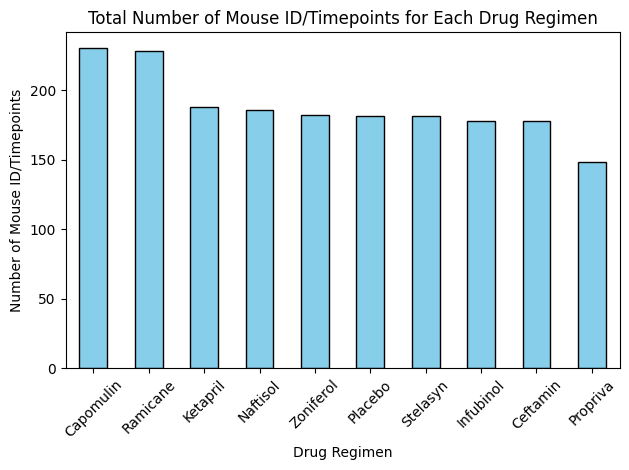

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import matplotlib.pyplot as plt

# Count the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Generate a bar plot
regimen_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


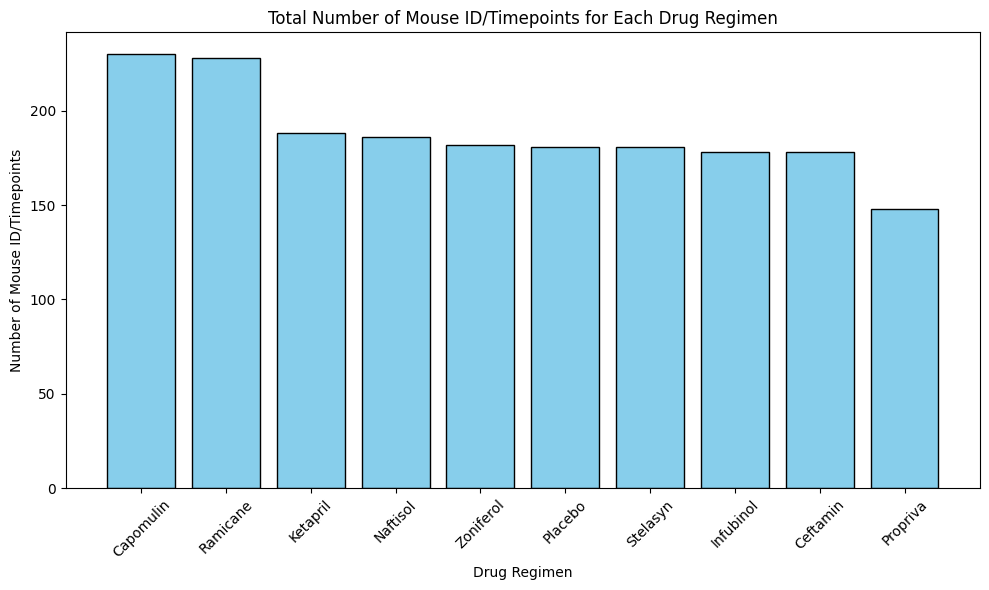

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Count the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create the bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


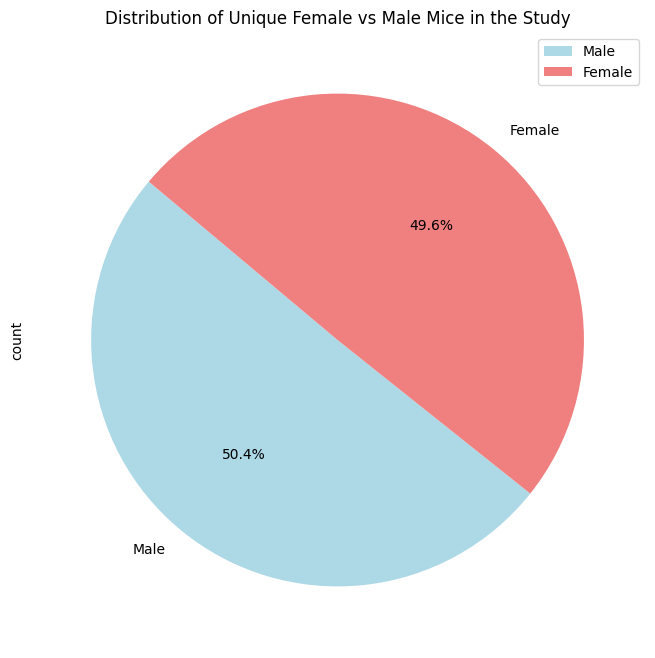

In [36]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

unique_mice = clean_data.drop_duplicates(subset='Mouse ID')

# Count the number of unique males and females
gender_counts = unique_mice['Sex'].value_counts()

# Generate the pie chart using Pandas
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140, legend=True)

# Add title
plt.title('Distribution of Unique Female vs Male Mice in the Study')

# Display the pie chart
plt.ylabel('count')  # Remove y-label for a cleaner look
plt.show()


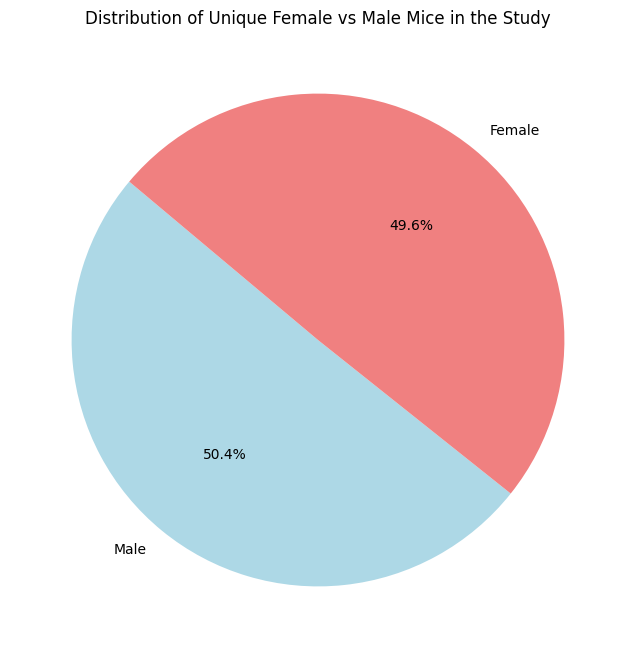

In [37]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


import pandas as pd
import matplotlib.pyplot as plt

# Assuming clean_data is your DataFrame with mouse metadata including gender

# Drop duplicates based on 'Mouse ID' to get unique mice
unique_mice = clean_data.drop_duplicates(subset='Mouse ID')

# Count the number of unique males and females
gender_counts = unique_mice['Sex'].value_counts()

# Generate the pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140)

# Add title
plt.title('Distribution of Unique Female vs Male Mice in the Study')

# Display the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint



last_timepoint_df = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


last_timepoint_data = pd.merge(last_timepoint_df, clean_data, on=['Mouse ID', 'Timepoint'])


treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = last_timepoint_data[last_timepoint_data['Drug Regimen'].isin(treatment_regimens)]


final_tumor_volumes = final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']]
final_tumor_volumes


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,a203,Infubinol,67.973419,45
1,a251,Infubinol,65.525743,45
3,a275,Ceftamin,62.999356,45
6,a411,Ramicane,38.407618,45
7,a444,Ramicane,43.047543,45
...,...,...,...,...
238,y769,Ceftamin,68.594745,45
239,y793,Capomulin,31.896238,45
240,y865,Ceftamin,64.729837,45
244,z578,Ramicane,30.638696,45


In [39]:

#Put treatments into a list for for loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create an empty list to fill with tumor volume data for plotting
tumor_volumes_list = []

#Loop through each treatment regimen to process the data
for treatment in treatments:
    # Locate the rows for each treatment and get the tumor volumes
    subset = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]
    tumor_volumes = subset['Tumor Volume (mm3)']
    
    # Add subset to the list
    tumor_volumes_list.append(tumor_volumes)
    
    # Calculate the IQR and determine potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Print outliers information for each treatment
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"Treatment: {treatment}")
    print(f"Potential outliers: {outliers.values}\n")

# Now, tumor_volumes_list contains the tumor volumes for each treatment regimen, which can be used for plotting



Treatment: Capomulin
Potential outliers: []

Treatment: Ramicane
Potential outliers: []

Treatment: Infubinol
Potential outliers: [36.3213458]

Treatment: Ceftamin
Potential outliers: []



C:\Users\nawri\AppData\Local\Temp\ipykernel_16212\2006414786.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volumes_by_treatment, labels=treatments, patch_artist=True,


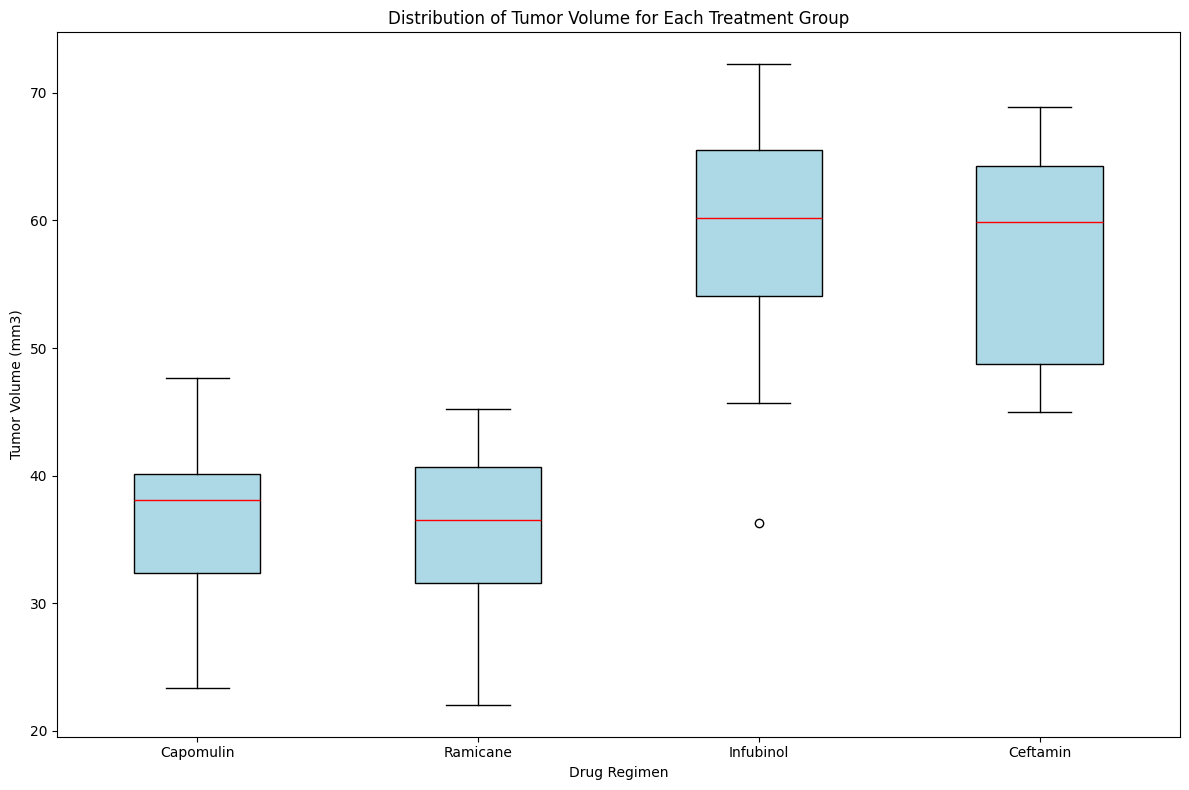

In [40]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

tumor_volumes_by_treatment = [final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]

# Generate the box plot
plt.figure(figsize=(12, 8))
plt.boxplot(tumor_volumes_by_treatment, labels=treatments, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))

# Add titles and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Display the box plot
plt.tight_layout()
plt.show()


## Line and Scatter Plots

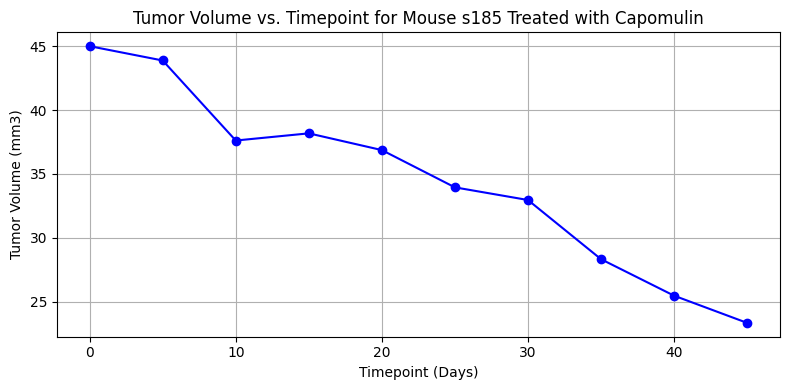

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter data for Capomulin treatment
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
mouse_id = 's185'

# Filter data for the selected mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate the line plot
plt.figure(figsize=(8, 4))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-')

# Add titles and labels
plt.title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Filter data for Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

#Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

Merge with mouse metadata to get mouse weights
mouse_metadata = pd.read_csv(r'file:///C:\Users\nawri\OneDrive\Desktop\Mouse_metadata.csv') 

# Merge the average tumor volume with mouse metadata
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID')

Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', edgecolor='black')

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (3630759559.py, line 9)

## Correlation and Regression

In [43]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
Calculate the correlation coefficient
correlation = merged_data[['Weight (g)', 'Tumor Volume (mm3)']].corr().iloc[0, 1]

Fit a linear regression model
x = merged_data['Weight (g)']
y = merged_data['Tumor Volume (mm3)']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

Generate the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', edgecolor='black', label='Mouse Data')
plt.plot(x, intercept + slope * x, color='red', label='Regression Line')

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Output the correlation coefficient
print(f'The correlation between mouse weight and the average tumor volume is {correlation:.2f}')

SyntaxError: invalid syntax (1236410518.py, line 4)